***Middle of Transducer Scan***

Here, I saved three .csv files from the oscilloscope with time/voltage data from the scanning the "middle of the transducer" on either side of the sandstone rock.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
directory = '/Users/Jilli/Documents/Research_2025/Jan21_2025/'

Rock Side 1

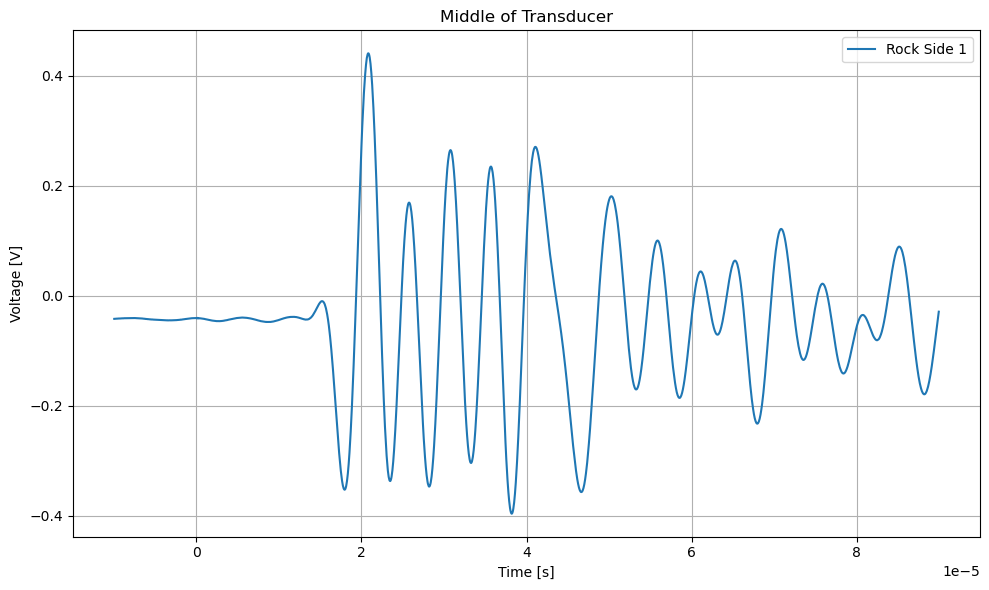

In [5]:
rock1 = "rock_1.csv"
data1 = pd.read_csv(rock1, skiprows=3, header=None, names=["Time (s)", "Voltage (V)"])
data1 = data1.dropna()
time1 = data1["Time (s)"]
voltage1 = data1["Voltage (V)"]

plt.figure(figsize=(10, 6))
plt.plot(time1, voltage1, label="Rock Side 1")
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Middle of Transducer")
 # plt.xlim([1e-5, 2e-5])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
import numpy as np


This piece calculates the arrival time at which the wave starts to travel through the rock, as you give it a baseline and a threshold to go off. It's not the most reliable so printing the graph helps to see its accuracy.

Baseline Mean: -0.041766 V
Baseline Std Dev: 0.000893 V
Threshold for Arrival: -0.039087 V
Arrival Time: 1.125000e-05 s


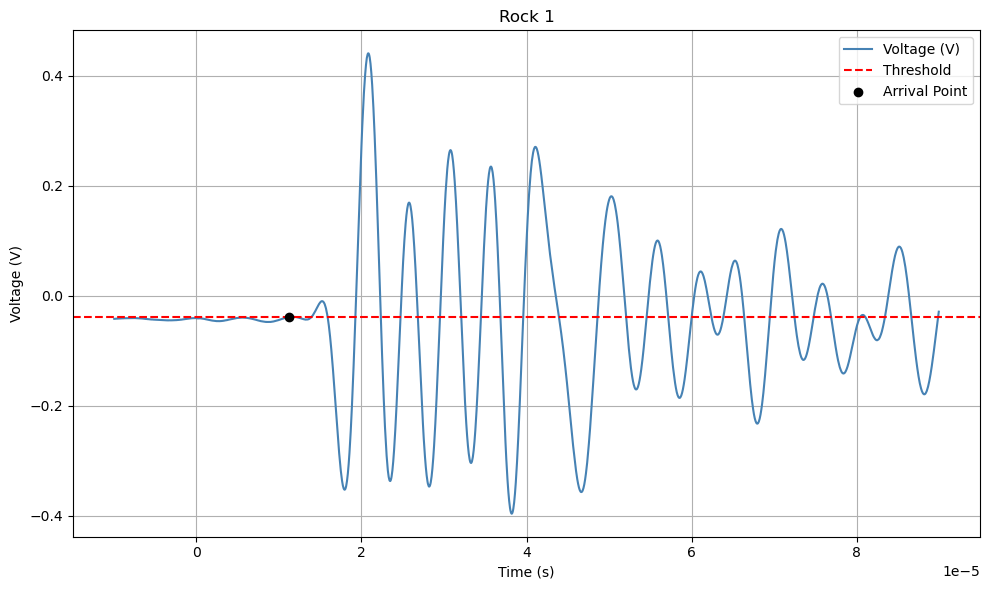

In [8]:
time = data1["Time (s)"].values
voltage = data1["Voltage (V)"].values
baseline_points = 100
baseline_voltage = voltage[:baseline_points]
baseline_mean = np.mean(baseline_voltage)
baseline_std = np.std(baseline_voltage)
threshold = baseline_mean + 3 * baseline_std
arrival_index = np.argmax(voltage > threshold)
arrival_time = time[arrival_index]

print(f"Baseline Mean: {baseline_mean:.6f} V")
print(f"Baseline Std Dev: {baseline_std:.6f} V")
print(f"Threshold for Arrival: {threshold:.6f} V")
print(f"Arrival Time: {arrival_time:.6e} s")

plt.figure(figsize=(10, 6))
plt.plot(time, voltage, label="Voltage (V)", color='steelblue')
plt.axhline(y=threshold, color="red", linestyle="--", label="Threshold")
plt.scatter([arrival_time], [voltage[arrival_index]], color="black", zorder=5, label="Arrival Point")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Rock 1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
arrival_voltage = voltage[arrival_index]

print(f"Arrival Time: {arrival_time:.6e} s")
print(f"Voltage at Arrival: {arrival_voltage:.6e} V")


Arrival Time: 1.125000e-05 s
Voltage at Arrival: -3.896371e-02 V


Rock Side 2

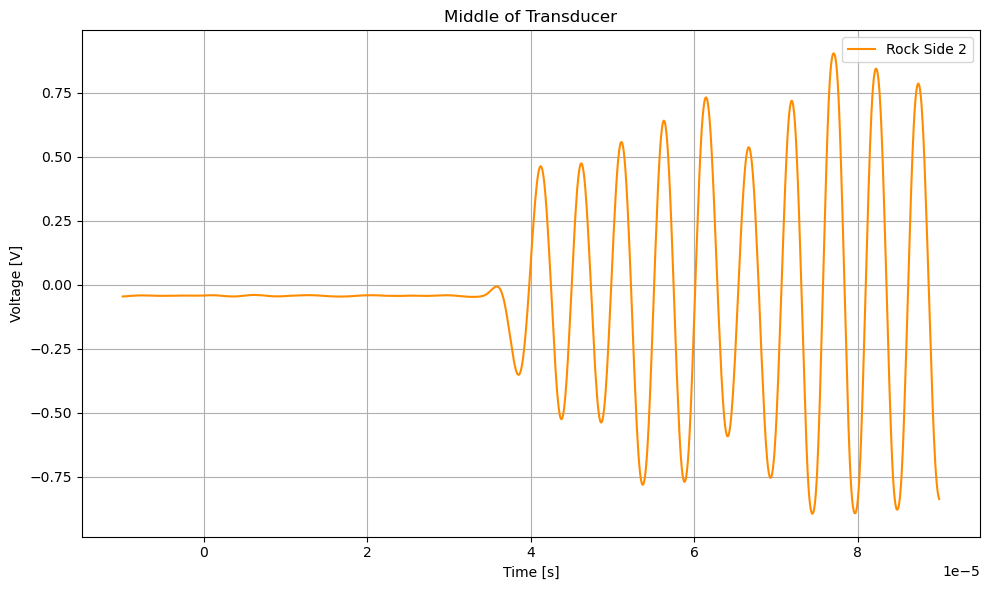

In [11]:
rock2 = "rock_2.csv"

data2 = pd.read_csv(rock2, skiprows=3, header=None, names=["Time (s)", "Voltage (V)"])
data2 = data2.dropna()
time = data2["Time (s)"]
voltage = data2["Voltage (V)"]

plt.figure(figsize=(10, 6))
plt.plot(time, voltage, label="Rock Side 2", color="darkorange")
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Middle of Transducer")
 # plt.xlim([1e-5, 2e-5])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Baseline Mean: -0.042895 V
Baseline Std Dev: 0.001149 V
Threshold for Arrival: -0.039448 V
Arrival Time: 3.445000e-05 s


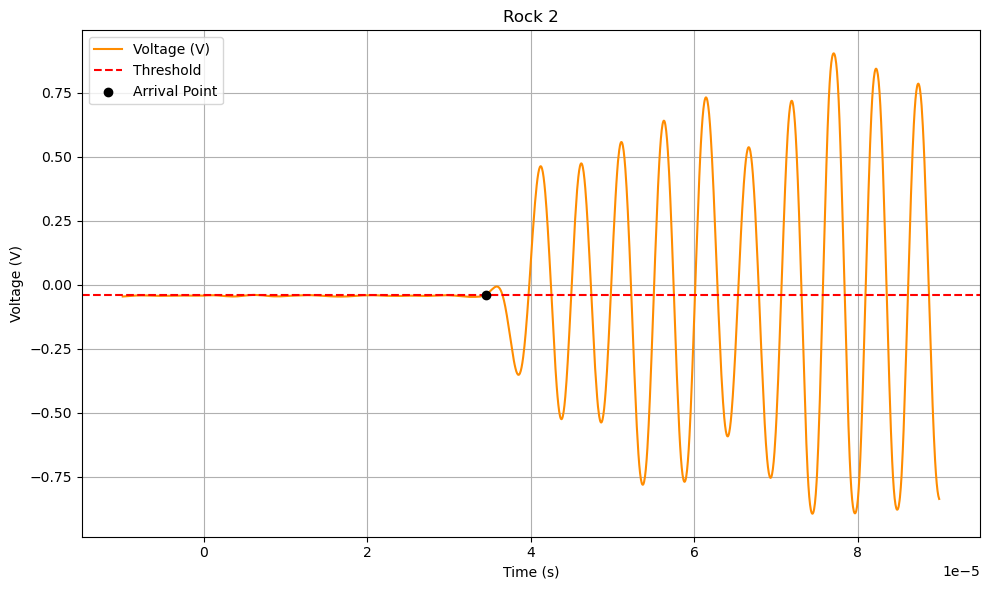

In [12]:
time = data2["Time (s)"].values
voltage = data2["Voltage (V)"].values
baseline_points = 100
baseline_voltage = voltage[:baseline_points]
baseline_mean = np.mean(baseline_voltage)
baseline_std = np.std(baseline_voltage)
threshold = baseline_mean + 3 * baseline_std
arrival_index = np.argmax(voltage > threshold)
arrival_time = time[arrival_index]

print(f"Baseline Mean: {baseline_mean:.6f} V")
print(f"Baseline Std Dev: {baseline_std:.6f} V")
print(f"Threshold for Arrival: {threshold:.6f} V")
print(f"Arrival Time: {arrival_time:.6e} s")

plt.figure(figsize=(10, 6))
plt.plot(time, voltage, label="Voltage (V)", color='darkorange')
plt.axhline(y=threshold, color="red", linestyle="--", label="Threshold")
plt.scatter([arrival_time], [voltage[arrival_index]], color="black", zorder=5, label="Arrival Point")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Rock 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Note: I didn't include Rock Side 3 because my rock_3.csv was being finicky, you might be able to just copy and paste the same cells from Rock Side 1 and 2.

In [13]:
arrival_voltage = voltage[arrival_index]

print(f"Arrival Time: {arrival_time:.6e} s")
print(f"Voltage at Arrival: {arrival_voltage:.6e} V")

Arrival Time: 3.445000e-05 s
Voltage at Arrival: -3.916634e-02 V


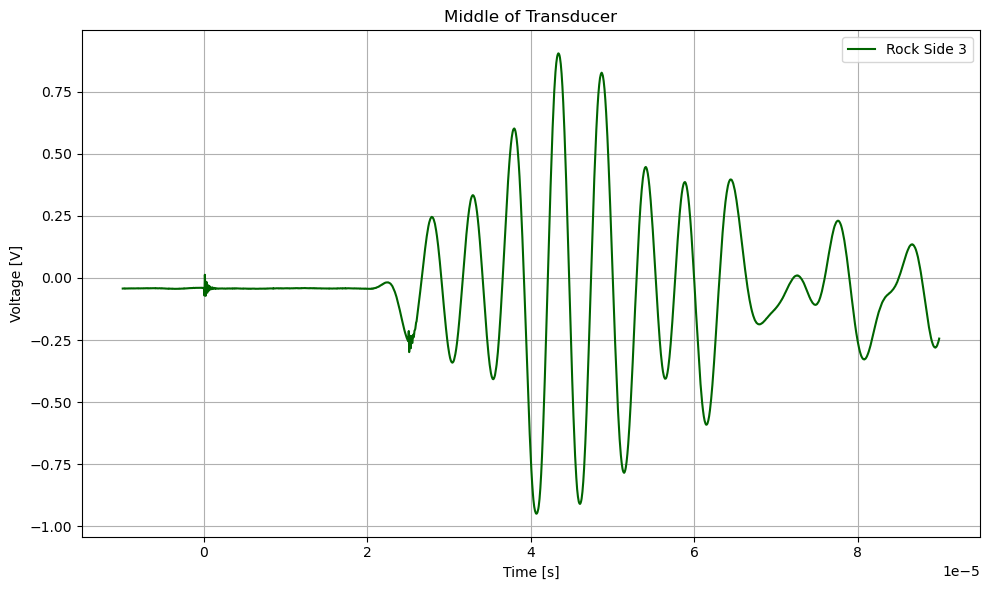

In [18]:
rock3 = "rock_3.csv"
data3 = pd.read_csv(rock3, skiprows=3, header=None, names=["Time (s)", "Voltage (V)"])
data3 = data3.dropna()
time = data3["Time (s)"]
voltage = data3["Voltage (V)"]

plt.figure(figsize=(10, 6))
plt.plot(time, voltage, label="Rock Side 3", color="darkgreen")
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Middle of Transducer")
 # plt.xlim([1e-5, 2e-5])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
arrival_voltage = voltage[arrival_index]

print(f"Arrival Time: {arrival_time:.6e} s")
print(f"Voltage at Arrival: {arrival_voltage:.6e} V")

Arrival Time: 3.445000e-05 s
Voltage at Arrival: -1.676143e-01 V


Plotting each rock side on one graph

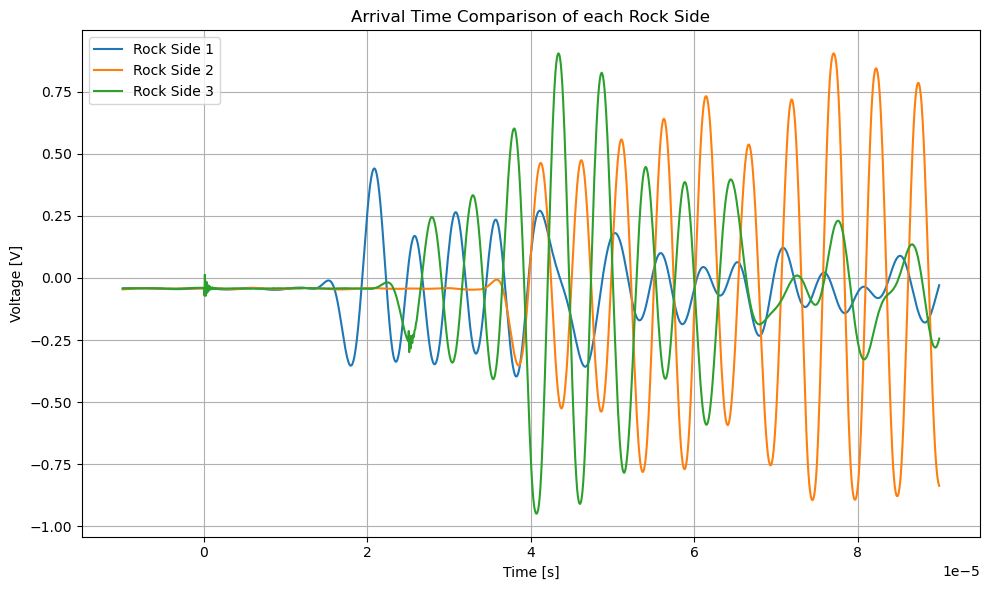

In [21]:
rock_sides = ["rock_1.csv", "rock_2.csv", "rock_3.csv"]
titles = ["Rock Side 1", "Rock Side 2", "Rock Side 3"]
plt.figure(figsize=(10, 6))

for i, file_path in enumerate(rock_sides):
    data = pd.read_csv(file_path, skiprows=3, header=None, names=["Time (s)", "Voltage (V)"])
    data = data.dropna()
    time = data["Time (s)"]
    voltage = data["Voltage (V)"]
    plt.plot(time, voltage, label=titles[i])

plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Arrival Time Comparison of each Rock Side")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


I measured each side of the rock and logged them as "distance" below in metres, the slope of the travel time versus distance graph should give us the inverse velocity of the rock.

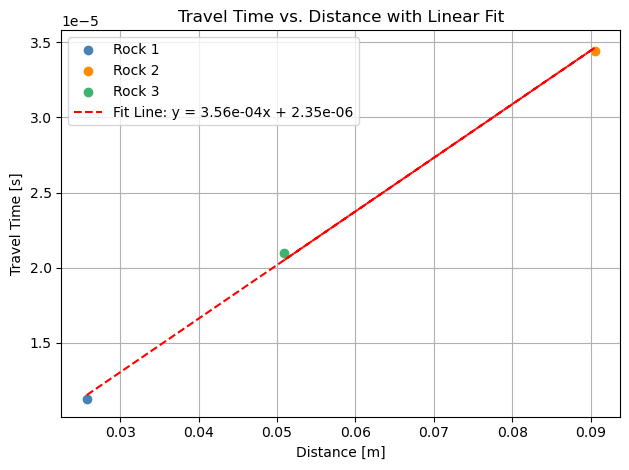

In [ ]:
distance = np.array([0.02572, 0.09052, 0.05091])
travel_time = np.array([1.125000e-05, 3.445000e-05, 2.095000e-05])
coefficients = np.polyfit(distance, travel_time, 1)
slope, intercept = coefficients
fit_line = slope * distance + intercept
labels = ["Rock Side 1", "Rock Side 2", "Rock Side 3"]
colors = ["steelblue", "darkorange", "mediumseagreen"]

for i in range(len(distance)):
    plt.scatter(distance[i], travel_time[i], color=colors[i], label=labels[i])

plt.plot(distance, fit_line, color="red", linestyle="--", label=f"Fit Line: y = {slope:.2e}x + {intercept:.2e}")
plt.xlabel("Distance [m]")
plt.ylabel("Travel Time [s]")
plt.title("Travel Time vs. Distance with Linear Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Same thing except millimetres and microseconds

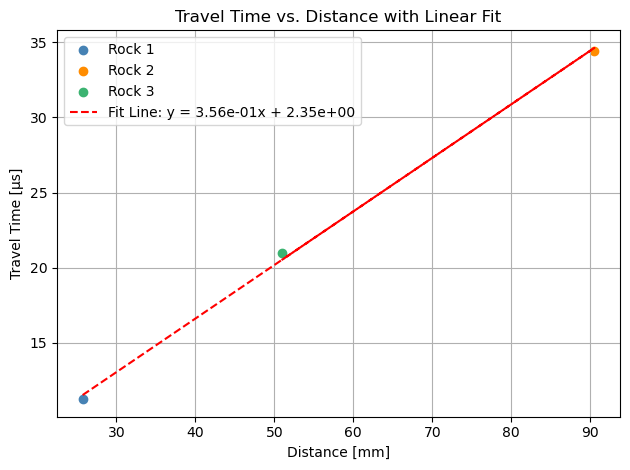

In [ ]:
distance = np.array([25.72, 90.52, 50.91])
travel_time = np.array([11.25, 34.45, 20.95])
coefficients = np.polyfit(distance, travel_time, 1)
slope, intercept = coefficients
fit_line = slope * distance + intercept
labels = ["Rock Side 1", "Rock Side 2", "Rock Side 3"]
colors = ["steelblue", "darkorange", "mediumseagreen"]

for i in range(len(distance)):
    plt.scatter(distance[i], travel_time[i], color=colors[i], label=labels[i])

plt.plot(distance, fit_line, color="red", linestyle="--", label=f"Fit Line: y = {slope:.2e}x + {intercept:.2e}")
plt.xlabel("Distance [mm]")
plt.ylabel("Travel Time [μs]")
plt.title("Travel Time vs. Distance with Linear Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()